In [74]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Foundation
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Foundation
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Foundation
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
df = pd.read_csv('ecommerceDataset.csv')

In [76]:
df.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [77]:
df.columns = ['target', 'features']

In [78]:
df

,target,features
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
...,...,...
50419,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50420,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50421,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50422,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [79]:
df['target'].value_counts()

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: target, dtype: int64

In [80]:
df['features']

0        SAF 'Floral' Framed Painting (Wood, 30 inch x ...
1        SAF 'UV Textured Modern Art Print Framed' Pain...
2        SAF Flower Print Framed Painting (Synthetic, 1...
3        Incredible Gifts India Wooden Happy Birthday U...
4        Pitaara Box Romantic Venice Canvas Painting 6m...
                               ...                        
50419    Strontium MicroSD Class 10 8GB Memory Card (Bl...
50420    CrossBeats Wave Waterproof Bluetooth Wireless ...
50421    Karbonn Titanium Wind W4 (White) Karbonn Titan...
50422    Samsung Guru FM Plus (SM-B110E/D, Black) Colou...
50423                     Micromax Canvas Win W121 (White)
Name: features, Length: 50424, dtype: object

In [81]:
df.isnull().sum()

target      0
features    1
dtype: int64

In [82]:
df.dropna(inplace=True)

In [83]:
df.isnull().sum()

target      0
features    0
dtype: int64

In [84]:
df

,target,features
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
...,...,...
50419,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50420,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50421,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50422,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
raw_documents = []

In [89]:
lemma = WordNetLemmatizer()

In [90]:
df['features'] = df['features'].apply(lambda a: a.lower())

In [91]:
def clean_text(text):
    
    text = re.sub('[^a-zA-Z ]', '', text)
    
    tokens = text.split()
    
    my_text = ' '.join(tokens)
    
    return my_text

In [92]:
clean_text('hello !, how are you doing today?')

'hello how are you doing today'

In [93]:
df['features'] = df['features'].apply(clean_text)

In [94]:
df['features'] = df['features'].apply(lambda a: lemma.lemmatize(a))

In [95]:
df['features']

0        saf floral framed painting wood inch x inch sp...
1        saf uv textured modern art print framed painti...
2        saf flower print framed painting synthetic inc...
3        incredible gifts india wooden happy birthday u...
4        pitaara box romantic venice canvas painting mm...
                               ...                        
50419    strontium microsd class gb memory card black w...
50420    crossbeats wave waterproof bluetooth wireless ...
50421    karbonn titanium wind w white karbonn titanium...
50422    samsung guru fm plus smbed black colourblack c...
50423                          micromax canvas win w white
Name: features, Length: 50423, dtype: object

In [100]:
X = df['features']

In [101]:
y = df.drop(labels='features', axis=1)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [105]:
X_train

44393    yamaha bds bluray disc player yamaha the most ...
46918    point blanc alex rider about the author anthon...
25114                     objective science and technology
38603    royal son rimless rectangular spectacle frame ...
39318    jwf cotton multi colour long skirt for women j...
                               ...                        
4180     usha fontana one mm ceiling fan with decorativ...
49724    niamia cad basic dual sim mobile phone with ma...
25773    mossad the greatest missions of the israeli se...
3491     fourwalls artificial calla lily plant in melam...
14100    minilec wlc d vac with sensor water level cont...
Name: features, Length: 40338, dtype: object

In [106]:
tfidf = TfidfVectorizer()

In [107]:
tfidf.fit(X_train)

TfidfVectorizer()

In [108]:
training_features = tfidf.transform(X_train)

In [109]:
training_features

<40338x91763 sparse matrix of type '<class 'numpy.float64'>'
	with 2741520 stored elements in Compressed Sparse Row format>

In [110]:
test_features = tfidf.transform(X_test)

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
encoder = LabelEncoder()

In [117]:
encoder.fit(y)

C:\Users\Foundation AI\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [128]:
target = encoder.transform(y_train)

C:\Users\Foundation AI\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
target

array([2, 2, 0, ..., 0, 3, 3])

In [133]:
y_test_target = encoder.transform(y_test)

C:\Users\Foundation AI\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
tree = DecisionTreeClassifier()

In [132]:
tree.fit(training_features, target)

DecisionTreeClassifier()

In [134]:
pred = tree.predict(test_features)

In [135]:
pred

array([3, 3, 0, ..., 1, 3, 3])

In [136]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report

C:\Users\Foundation AI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


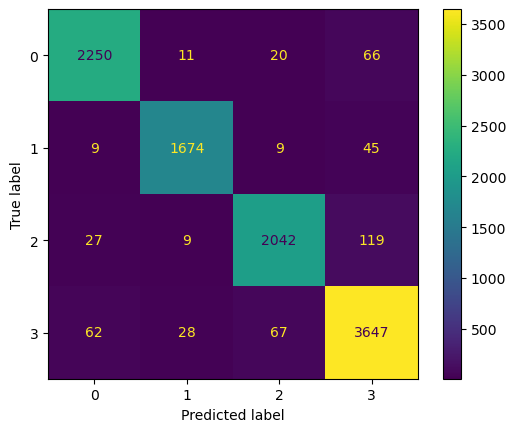

In [137]:
plot_confusion_matrix(estimator=tree, X=test_features, y_true=y_test_target)

In [138]:
confusion_matrix(y_test_target, pred)

array([[2250,   11,   20,   66],
       [   9, 1674,    9,   45],
       [  27,    9, 2042,  119],
       [  62,   28,   67, 3647]], dtype=int64)

In [139]:
print(classification_report(y_test_target, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2347
           1       0.97      0.96      0.97      1737
           2       0.96      0.93      0.94      2197
           3       0.94      0.96      0.95      3804

    accuracy                           0.95     10085
   macro avg       0.96      0.95      0.95     10085
weighted avg       0.95      0.95      0.95     10085



In [140]:
accuracy_score(y_test_target, pred)

0.9531978185423897

In [143]:
q = ['Think And Grow Rich SELF HELP BOOK BY NAPOLEON HILL']

In [144]:
q = tfidf.transform(q)

In [145]:
q

<1x91763 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [146]:
p = tree.predict(q)

In [147]:
p

array([0])

In [148]:
encoder.inverse_transform(p)

array(['Books'], dtype=object)

In [155]:
q = ['boAt AUX 500 Indestructible Male to Male Metallic Aux Audio Cable with Gold Plated connectors, 1.5 Meter (5 Feet) - Grey Colour:Grey   3.5MM male to 3.5MM male cable Ã¢â‚¬Â¢ Compatible with smartphones and tablets Ã¢â‚¬Â¢ Spaceship grade aluminum casing ensures long-lasting durability Ã¢â‚¬Â¢ Metal braided heavy-duty aux cable, is stress and stretch resistant, protects against day-to-day wear and tear Ã¢â‚¬Â¢ Tangle-free cord design eliminates bunching, tangles, knots and 1.5 meters length Ã¢â‚¬Â¢ Dual-shielding, polished metal molding, corrosion-resistant plugs deliver crisp sounds and minimal signal loss']

In [156]:
q = tfidf.transform(q)

In [157]:
p = tree.predict(q)

In [158]:
p

array([2])

In [159]:
encoder.inverse_transform(p)

array(['Electronics'], dtype=object)

In [165]:
q = ['Xs and Os Women Babydoll Nightwear Lingerie with Panty/g-String Xs and Os women babydoll nightwear see through lingerie with a special design of lace at front comes with a matching g-string/ panty. Babydoll Nightwear Lingerie with adjustable strap at back so that your bust can be adjusted accordingly . A long satin bow attached in front which makes it look tempting .This babydoll lingerie features a short length extending to or just over the hips, which flatters body shape and make you look sexier. This is a FREE SIZE bra panty lingerie set . One size fits most . Perfect for SMALL,MEDIUM and LARGE .Size Range: Bust ( 30 to 36 inch) , Waist ( 28 to 36 inch ).']

In [166]:
q = tfidf.transform(q)

In [167]:
p = tree.predict(q)

In [168]:
p

array([1])

In [169]:
encoder.inverse_transform(p)

array(['Clothing & Accessories'], dtype=object)